<a href="https://colab.research.google.com/github/AnvayM/Data-Science/blob/House_Price/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. **

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/Colab Notebooks/House/train.csv"
path2="/content/drive/MyDrive/Colab Notebooks/House/test.csv"
path3="/content/drive/MyDrive/Colab Notebooks/House/sample_submission.csv"
house_train=pd.read_csv(path)
house_test=pd.read_csv(path2)
sample_submission=pd.read_csv(path3)


##**With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home**.

In [3]:
house_train.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

##We will DO Feature selection 

In [4]:
#Since the data is hudge we need can select only continous data set.
numerical_list=["int16","int32","int64","float16","float32","float64"]

In [5]:
numerical_col=list(house_train.select_dtypes(numerical_list).columns)

In [6]:
numerical_col


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
#assigning numerical column to house_train.
house_train=house_train[numerical_col]

house_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [8]:
X=house_train.drop("SalePrice",axis=1)

In [9]:
y=house_train["SalePrice"]


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [11]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,0,318,1057,1057,977,0,2034,1,0,2,1,3,1,8,0,1998.0,2,645,576,36,0,0,0,0,0,2,2009
682,683,120,NaN,2887,6,5,1996,1997,0.0,1003,0,288,1291,1291,0,0,1291,1,0,1,0,2,1,6,1,1996.0,2,431,307,0,0,0,0,0,0,11,2008
960,961,20,50.0,7207,5,7,1958,2008,0.0,696,0,162,858,858,0,0,858,1,0,1,0,2,1,4,0,NaN,0,0,117,0,0,0,0,0,0,2,2010
1384,1385,50,60.0,9060,6,5,1939,1950,0.0,204,0,356,560,698,560,0,1258,0,0,1,0,2,1,6,0,1939.0,1,280,0,0,0,0,0,0,0,10,2009
1100,1101,30,60.0,8400,2,5,1920,1950,0.0,290,0,0,290,438,0,0,438,0,0,1,0,1,1,3,0,1930.0,1,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,0,89,1252,1268,1097,0,2365,1,0,2,1,3,1,8,1,1999.0,3,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,0,625,1067,1067,0,0,1067,0,0,2,0,2,1,4,0,1996.0,2,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,0,0,0,1318,584,0,1902,0,0,2,0,4,2,8,0,1978.0,2,539,0,0,0,0,0,0,0,4,2010
559,560,120,NaN,3196,7,5,2003,2004,18.0,0,0,1374,1374,1557,0,0,1557,0,0,2,0,2,1,7,1,2003.0,2,420,143,20,0,0,0,0,0,10,2006


In [41]:
X_train.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
GarageArea     0
dtype: int64

In [13]:
X_train["LotFrontage"].mean()

69.66866746698679

In [14]:
X_train.fillna({"LotFrontage":69.668},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
X_train.fillna({"MasVnrArea":X_train["MasVnrArea"].mean()},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
X_train.fillna({"GarageYrBlt":X_train["GarageYrBlt"].mean()},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [17]:
mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([0.        , 0.25356961, 0.20689978, 0.16479366, 0.53416101,
       0.10386543, 0.34479834, 0.24738152, 0.10822952, 0.1623521 ,
       0.00649358, 0.11320099, 0.38352395, 0.31024538, 0.22485939,
       0.00642094, 0.48016493, 0.02632883, 0.        , 0.27715346,
       0.08414555, 0.03949455, 0.01490923, 0.17851433, 0.19570093,
       0.25504955, 0.38439818, 0.36976133, 0.0733727 , 0.17375301,
       0.01786708, 0.00552245, 0.02181269, 0.00491484, 0.        ,
       0.        , 0.01253061])

In [18]:
#Creating a series of mutual info
mutual_info=pd.Series(mutual_info)
mutual_info

0     0.000000
1     0.253570
2     0.206900
3     0.164794
4     0.534161
5     0.103865
6     0.344798
7     0.247382
8     0.108230
9     0.162352
10    0.006494
11    0.113201
12    0.383524
13    0.310245
14    0.224859
15    0.006421
16    0.480165
17    0.026329
18    0.000000
19    0.277153
20    0.084146
21    0.039495
22    0.014909
23    0.178514
24    0.195701
25    0.255050
26    0.384398
27    0.369761
28    0.073373
29    0.173753
30    0.017867
31    0.005522
32    0.021813
33    0.004915
34    0.000000
35    0.000000
36    0.012531
dtype: float64

In [19]:
mutual_info.index=X_train.columns
mutual_info

Id               0.000000
MSSubClass       0.253570
LotFrontage      0.206900
LotArea          0.164794
OverallQual      0.534161
OverallCond      0.103865
YearBuilt        0.344798
YearRemodAdd     0.247382
MasVnrArea       0.108230
BsmtFinSF1       0.162352
BsmtFinSF2       0.006494
BsmtUnfSF        0.113201
TotalBsmtSF      0.383524
1stFlrSF         0.310245
2ndFlrSF         0.224859
LowQualFinSF     0.006421
GrLivArea        0.480165
BsmtFullBath     0.026329
BsmtHalfBath     0.000000
FullBath         0.277153
HalfBath         0.084146
BedroomAbvGr     0.039495
KitchenAbvGr     0.014909
TotRmsAbvGrd     0.178514
Fireplaces       0.195701
GarageYrBlt      0.255050
GarageCars       0.384398
GarageArea       0.369761
WoodDeckSF       0.073373
OpenPorchSF      0.173753
EnclosedPorch    0.017867
3SsnPorch        0.005522
ScreenPorch      0.021813
PoolArea         0.004915
MiscVal          0.000000
MoSold           0.000000
YrSold           0.012531
dtype: float64

In [20]:
mutual_info.sort_values(ascending=False)


OverallQual      0.534161
GrLivArea        0.480165
GarageCars       0.384398
TotalBsmtSF      0.383524
GarageArea       0.369761
YearBuilt        0.344798
1stFlrSF         0.310245
FullBath         0.277153
GarageYrBlt      0.255050
MSSubClass       0.253570
YearRemodAdd     0.247382
2ndFlrSF         0.224859
LotFrontage      0.206900
Fireplaces       0.195701
TotRmsAbvGrd     0.178514
OpenPorchSF      0.173753
LotArea          0.164794
BsmtFinSF1       0.162352
BsmtUnfSF        0.113201
MasVnrArea       0.108230
OverallCond      0.103865
HalfBath         0.084146
WoodDeckSF       0.073373
BedroomAbvGr     0.039495
BsmtFullBath     0.026329
ScreenPorch      0.021813
EnclosedPorch    0.017867
KitchenAbvGr     0.014909
YrSold           0.012531
BsmtFinSF2       0.006494
LowQualFinSF     0.006421
3SsnPorch        0.005522
PoolArea         0.004915
BsmtHalfBath     0.000000
MoSold           0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

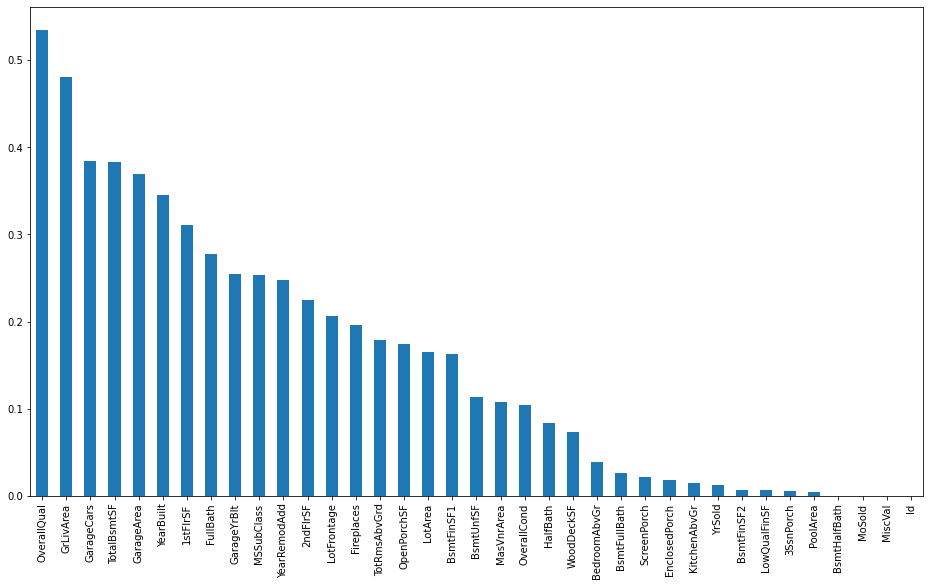

In [21]:
#plotting the bar which shows the variables having high impact on independent var
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16,9))

In [22]:
 select_top_columns= SelectPercentile(mutual_info_regression,percentile=20)
 select_top_columns.fit(X_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7fadc24d9e60>)

In [23]:
p=X_train.columns[select_top_columns.get_support()]

In [24]:
select_top_columns.get_support(True)

array([ 4,  6, 12, 13, 16, 19, 26, 27])

In [25]:
select_top_columns.get_support(False)

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [26]:
p

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea'],
      dtype='object')

In [27]:
X_train=X_train[p]
X_test=X_test[p]


In [28]:
X_train

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
64,7,1997,1057,1057,2034,2,2,645
682,6,1996,1291,1291,1291,1,2,431
960,5,1958,858,858,858,1,0,0
1384,6,1939,560,698,1258,1,1,280
1100,2,1920,290,438,438,1,1,246
...,...,...,...,...,...,...,...,...
763,8,1999,1252,1268,2365,2,3,856
835,4,1950,1067,1067,1067,2,2,436
1216,6,1978,0,1318,1902,2,2,539
559,7,2003,1374,1557,1557,2,2,420


In [29]:

sc=StandardScaler()

In [30]:

sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr.coef_

array([25478.47360691, 11060.74205715, 12019.5594209 ,  4219.60871179,
       29804.95914474, -3476.80438727,   737.40065312,  9885.11376791])

In [35]:
lr.intercept_

180586.22896281802

In [36]:
X_test_sc[0,:]

array([-0.05839596, -0.46117929,  2.38920418,  3.62029584,  1.91836248,
        2.62969319,  0.32139819,  0.06996248])

In [37]:
lr.predict([X_test_sc[0,:]])

array([266953.19010053])

In [38]:
X_test_sc

array([[-0.05839596, -0.46117929,  2.38920418, ...,  2.62969319,
         0.32139819,  0.06996248],
       [-0.05839596, -0.990498  , -0.60810332, ..., -1.06452872,
        -1.04154351, -1.09913238],
       [-0.79519441, -0.69275623, -0.84466868, ..., -1.06452872,
        -1.04154351, -0.56249868],
       ...,
       [ 1.41520093,  0.79595266,  2.56967673, ...,  0.78258224,
         1.6843399 ,  1.77089966],
       [ 0.67840248,  1.0275296 ,  1.2624702 , ...,  0.78258224,
         0.32139819,  0.35744482],
       [ 2.15199937,  1.25910653,  3.10865554, ...,  0.78258224,
         1.6843399 ,  1.67986359]])

In [39]:
lr.predict(X_test_sc)

array([266953.19010053, 153818.9769293 , 119442.63512668, 231079.75645395,
       124820.57899449, 100632.97799357, 254497.94317738, 152291.95328514,
       495239.28624013, 162113.2908931 , 209101.05353079, 195721.2859853 ,
       229133.94209187, 108834.68290453, 137307.1362811 , 147165.48785272,
       220570.8074971 ,  95188.61680602, 140925.07113126, 176334.31477949,
       147781.23645889, 144352.49010476, 111982.23525804, 161149.50754765,
       194462.79396469, 191689.57281396, 175576.56320585,  51058.36946344,
       296294.31409276, 120281.89577995, 210988.61109443, 204916.24695043,
       142787.44502923, 284522.17426606, 315183.69101727, 182718.40244492,
       271064.45947934, 119151.01536579, 239925.75123686, 313194.86800677,
       226164.31363237, 136512.40332239, 201485.19845583, 294426.37914681,
       328970.3183594 , 186702.4260617 , 119600.71810722, 113541.34214716,
       180291.81364111,  60064.61192723, 343585.7027068 , 137901.43476188,
       186186.16464926,  

In [40]:
lr.score(X_test_sc,y_test)

0.6977319888822124